## Machine Learning Model Building Pipeline: Data Analysis


===================================================================================================

## Predicting Client Arrears

The aim of the project is to build a machine learning model to predict the Clients Arrears based on different explanatory variables describing aspects of profile and bureaus. 

### Why is this important? 

Predicting client arrears is useful to identify trustful clients, or to determine whether the client will have an acceptable rate of miss-payments.

### What is the objective of the machine learning model?

We aim to minimise the difference between the maximum arrear of a client and the arrear estimated by our model. We will evaluate model performance using the mean squared error (mse) and the root squared of the mean squared error (rmse).

### How do I get the dataset?

AWS Account:
S3 Bucket:
S3 Path:
Contact: 
Dataset name:
Dataset date:
Dataset time range:

**Note the following:**
-  You need to have access to the aws console and be able to read Bucket specifyed path.
-  If you save the file to the same directory where you saved this jupyter notebook, then you can run the code as it is written here.

====================================================================================================

## Clients tuca and directSale dataset: Feature Engineering

In the following cells, we will engineer / pre-process the variables. We will engineer the variables so that we tackle:

1. Missing values
2. Temporal variables
3. Non-Gaussian distributed variables
4. Categorical variables: remove rare labels
5. Categorical variables: convert strings to numbers
5. Standarise the values of the variables to the same range

### Setting the seed

It is important to note that we are engineering variables and pre-processing data with the idea of deploying the model. Therefore, from now on, for each step that includes some element of randomness, it is extremely important that we **set the seed**. This way, we can obtain reproducibility between our research and our development code.

**Always set the seeds**.

Let's go ahead and load the dataset.

In [56]:
target_var = 'maxmora'
identifier = ['ide_tramite', 'ide_cui', 'id_credito', 'id_solicitud', 'id_tramite']

In [57]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore')

In [58]:
# load dataset
data = pd.read_csv('dataset.csv')
print(data.shape)
data.head()

(27638, 151)


,id_solicitud,key_solicitud,id_credito,maxmora,qty_meses_desde_desembolso,dfi_solicitud_mora,dfi_solicitud_productos,cl_unq_act_act_messolicitud,cl_unq_act_act_trimestresolicitud,active_cch3_months,ide_tramite,id_tramite,ide_cui,cl_unq_act_act_fechasolicitud,cl_unq_act_act_fechasolicitud_date,cl_unq_act_act_monto,cl_unq_act_act_plazo,cl_unq_act_act_agencia,cl_unq_act_act_ptodestino,cl_unq_act_act_flagaprobado,cl_unq_act_act_longlat,cl_unq_act_act_longitud,cl_unq_act_act_latitud,cl_unq_act_act_depnacimiento,cl_unq_act_act_estadocivil,cl_unq_act_act_estadocivilmodificado,cl_unq_act_act_genero,cl_unq_act_act_profesion,cl_unq_act_act_profesionmodificada,cl_unq_act_act_flagpuedeescribir,cl_unq_act_act_flagpuedeleer,cl_unq_act_act_flaghablaespa_ol,cl_unq_act_act_flagpuedefirmar,cl_unq_act_act_flaghablaotroidioma,cl_unq_act_act_nivelacademico,cl_unq_act_act_tiempovivirresidencia,cl_unq_act_act_tipovivienda,cl_unq_act_act_personasdependientes,cl_unq_act_act_tipolocalidad,cl_unq_act_act_topografia,cl_unq_act_act_flagaccesovehicular,cl_unq_act_act_tipoaccesovehicular,cl_unq_act_act_tipoaccesopeatonal,cl_unq_act_act_flagaccesomensajeros,cl_unq_act_act_flagpidenimpuesto,cl_unq_act_act_vivtipoconstruccion,cl_unq_act_act_cantidadniveles,cl_unq_act_act_cantidaddormitorios,cl_unq_act_act_cantidadba_os,cl_unq_act_act_flagtienecocina,cl_unq_act_act_flagtienesala,cl_unq_act_act_flagtienejardin,cl_unq_act_act_flagtienegarage,cl_unq_act_act_flagtienecomedor,cl_unq_act_act_vehiculo,cl_unq_act_act_fuenteingresos,cl_unq_act_act_tiponegocio,cl_unq_act_act_depnegocio,cl_unq_act_act_flagvendealcredito,cl_unq_act_act_negociomontoventasefectivo,cl_unq_act_act_negociototalingresos,cl_unq_act_act_totalbienes,cl_unq_act_act_totalpasivos,cl_unq_act_act_totalgastosfam,cl_unq_act_act_totalingresosfam,cl_unq_act_act_estresventas,cl_unq_act_act_estrescostoventas,cl_unq_act_act_estresgrossprofit,cl_unq_act_act_flagtieneelectricidad,cl_unq_act_act_flagtieneagua,cl_unq_act_act_flagtienetelfijo,cl_unq_act_act_flagtienecelular,cl_unq_act_act_flagtienetvcable,cl_unq_act_act_flagtienerefrigerador,cl_unq_act_act_flagtienelavadora,cl_unq_act_act_flagtienesecadora,cl_unq_act_act_flagtienehorno,cl_unq_act_act_flagtienemicroondas,cl_unq_act_act_flagtienestereo,cl_unq_act_act_fnacimiento_date,cl_unq_act_act_finicionegocio_date,cl_unq_act_act_fnacimiento_date_numberlong,cl_unq_act_act_finicionegocio_date_numberlong,id_mora,fecha_de_cierre_mora,fecha_consulta_date_mora,cl_cnt_12m_act_comcantidadmora1,cl_cnt_24m_act_comcantidadmora1,cl_cnt_12m_act_comcantidadmora2,cl_cnt_24m_act_comcantidadmora2,cl_des_12m_act_commaxdesvmora,cl_des_24m_act_commaxdesvmora,cl_max_12m_act_commaxmora,cl_max_24m_act_commaxmora,cl_max_act_act_commaxmora,cl_cnt_12m_act_ptocantidadmora1,cl_cnt_24m_act_ptocantidadmora1,cl_cnt_12m_act_ptocantidadmora2,cl_cnt_24m_act_ptocantidadmora2,cl_max_12m_act_ptomaxdesvmora,cl_max_24m_act_ptomaxdesvmora,cl_max_12m_act_ptomaxmora,cl_max_24m_act_ptomaxmora,cl_max_act_act_ptomaxmora,cl_cnt_12m_act_tccantidadmora1,cl_cnt_24m_act_tccantidadmora1,cl_cnt_12m_act_tccantidadmora2,cl_cnt_24m_act_tccantidadmora2,cl_des_12m_act_tcmaxdesvmora,cl_des_24m_act_tcmaxdesvmora,cl_max_12m_act_tcmaxmora,cl_max_24m_act_tcmaxmora,cl_unq_act_act_tcmoraact,cl_cnt_12m_act_servcantidadmora1,cl_cnt_12m_act_servcantidadmora2,cl_des_12m_act_servmaxdesvmora,cl_max_12m_act_servmaxmora,cl_max_act_act_servmaxmora,id_productos,fecha_de_cierre_productos,fecha_consulta_date_tu,cl_min_his_act_ptoexptotal,cl_min_his_act_ptoexpvig,cl_cnt_his_act_comcantidadtotal,cl_sum_his_act_commontototal,cl_cnt_act_act_comcantidadvig,cl_sum_act_act_commontovig,cl_sum_act_act_comsaldoenmora,cl_sum_act_act_comsaldovig,cl_cnt_his_act_ptocantidadtotal,cl_sum_his_act_ptomontototal,cl_cnt_act_act_ptocantidadvig,cl_sum_act_act_ptomontovigente,cl_sum_act_act_ptosaldomora,cl_sum_act_act_ptosaldovig,cl_cnt_act_act_servcantidadvig,cl_sum_act_act_servsaldomora,cl_sum_act_act_servsaldovig,cl_cnt_his_act_tccantidadtotal,cl_sum_his_ac

In [59]:
data.groupby([target_var])[target_var].sum()

maxmora
0       0
1    7579
2     888
3     366
4     100
Name: maxmora, dtype: int64

## Separate dataset into train and test

Before beginning to engineer our features, it is important to separate our data intro training and testing set. When we engineer features, some techniques learn parameters from data. It is important to learn this parameters only from the train set. This is to avoid over-fitting. 

**Separating the data into train and test involves randomness, therefore, we need to set the seed.**

In [89]:
# Let's separate into train and test set
# Remember to set the seed (random_state for this sklearn function)

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data[target_var],
                                                    test_size=0.1,
                                                    # we are setting the seed here:
                                                    random_state=0)  

X_train.shape, X_test.shape

((24874, 151), (2764, 151))

In [90]:
X_test.to_csv('datasettest.csv', index=False)

In [91]:
NA_NOT_ALLOWED = [
    'cl_unq_act_act_ptodestino',
    'cl_unq_act_act_flagpuedeescribir',
    'cl_unq_act_act_flagpuedeleer',
    'cl_unq_act_act_flagaccesovehicular',
    'cl_unq_act_act_flagaccesomensajeros',
    'cl_unq_act_act_flagtienegarage',
    'cl_unq_act_act_flagtienecomedor',
    'cl_unq_act_act_flagtieneagua',
    'cl_unq_act_act_flagtienerefrigerador',
    'cl_unq_act_act_flagtienelavadora',
    'cl_unq_act_act_flagtienestereo',
    'qty_meses_desde_desembolso',
    'cl_unq_act_act_messolicitud',
    'cl_unq_act_act_fechasolicitud',
    'cl_unq_act_act_fnacimiento_date'
]
NUMERICALS_LOG_VARS = [
    "cl_unq_act_act_totalgastosfam",
    "cl_unq_act_act_negociototalingresos",
    "cl_unq_act_act_totalbienes",
    "cl_unq_act_act_monto"
]

In [92]:
from itertools import compress
print(X_test.shape)
vars_with_neg_values = list(compress(
                            NUMERICALS_LOG_VARS, 
                            (X_test[NUMERICALS_LOG_VARS] == 0).any().tolist())
                           )
ver = ~(X_test[NUMERICALS_LOG_VARS] <= 0).any(axis = 1)
X_test = X_test.loc[ver]
print(X_test.shape)

if X_test[NA_NOT_ALLOWED].isnull().any().any():
        X_test = X_test.dropna(
            axis=0, subset=NA_NOT_ALLOWED
        )
print(X_test.shape)

(2764, 151)
(2750, 151)
(2410, 151)


## Missing values

### Categorical variables
For categorical variables, we will replace missing values with the string "missing".

In [6]:
# make a list of the categorical variables that contain missing values

vars_with_na = [
    var for var in data.columns
    if X_train[var].isnull().sum() > 0 and X_train[var].dtypes == 'O'
]

# print percentage of missing values per variable
X_train[vars_with_na].isnull().mean()

cl_unq_act_act_longlat                  0.031438
cl_unq_act_act_depnacimiento            0.019136
cl_unq_act_act_estadocivil              0.018574
cl_unq_act_act_estadocivilmodificado    0.659966
cl_unq_act_act_genero                   0.020383
cl_unq_act_act_profesion                0.018172
cl_unq_act_act_profesionmodificada      0.919916
cl_unq_act_act_flaghablaespa_ol         0.019981
cl_unq_act_act_flagpuedefirmar          0.019981
cl_unq_act_act_nivelacademico           0.019981
cl_unq_act_act_tiempovivirresidencia    0.018574
cl_unq_act_act_tipovivienda             0.018574
cl_unq_act_act_tipolocalidad            0.020383
cl_unq_act_act_topografia               0.020383
cl_unq_act_act_tipoaccesovehicular      0.020745
cl_unq_act_act_tipoaccesopeatonal       0.020383
cl_unq_act_act_vivtipoconstruccion      0.020383
cl_unq_act_act_fuenteingresos           0.020383
cl_unq_act_act_tiponegocio              0.049570
cl_unq_act_act_depnegocio               0.048525
cl_unq_act_act_fnaci

In [7]:
# replace missing values with new label: "Missing"

X_train[vars_with_na] = X_train[vars_with_na].fillna('Missing')
X_test[vars_with_na] = X_test[vars_with_na].fillna('Missing')

In [8]:
# check that we have no missing information in the engineered variables
X_train[vars_with_na].isnull().sum()

cl_unq_act_act_longlat                  0
cl_unq_act_act_depnacimiento            0
cl_unq_act_act_estadocivil              0
cl_unq_act_act_estadocivilmodificado    0
cl_unq_act_act_genero                   0
cl_unq_act_act_profesion                0
cl_unq_act_act_profesionmodificada      0
cl_unq_act_act_flaghablaespa_ol         0
cl_unq_act_act_flagpuedefirmar          0
cl_unq_act_act_nivelacademico           0
cl_unq_act_act_tiempovivirresidencia    0
cl_unq_act_act_tipovivienda             0
cl_unq_act_act_tipolocalidad            0
cl_unq_act_act_topografia               0
cl_unq_act_act_tipoaccesovehicular      0
cl_unq_act_act_tipoaccesopeatonal       0
cl_unq_act_act_vivtipoconstruccion      0
cl_unq_act_act_fuenteingresos           0
cl_unq_act_act_tiponegocio              0
cl_unq_act_act_depnegocio               0
cl_unq_act_act_fnacimiento_date         0
cl_unq_act_act_finicionegocio_date      0
fecha_de_cierre_mora                    0
fecha_consulta_date_mora          

In [9]:
# check that test set does not contain null values in the engineered variables
[var for var in vars_with_na if X_test[var].isnull().sum() > 0]

[]

### Numerical variables

To engineer missing values in numerical variables, we will:

- add a binary missing value indicator variable
- and then replace the missing values in the original variable with the mode


In [10]:
# make a list with the numerical variables that contain missing values
vars_with_na = [
    var for var in data.columns
    if 0 < X_train[var].isnull().mean() < 1 and X_train[var].dtypes != 'O' 
]

# print percentage of missing values per variable
X_train[vars_with_na].isnull().mean()

dfi_solicitud_mora                             0.831792
dfi_solicitud_productos                        0.776152
cl_unq_act_act_plazo                           0.020383
cl_unq_act_act_personasdependientes            0.017046
cl_unq_act_act_cantidadniveles                 0.020383
                                                 ...   
cl_sum_act_act_tcporcentajesaldomora           0.998352
cl_sum_act_act_tcporcentajeutilizacion         0.997789
cl_sum_act_act_ptoporcentajepagadomontosvig    0.876417
cl_sum_act_act_ptoporcentajesaldoenmora        0.877704
cl_sum_act_act_servporcentajesaldomora         0.999799
Length: 82, dtype: float64

In [11]:
(X_train['cl_unq_act_act_totalgastosfam'] == 0).any()

True

In [12]:
# replace zeros in variables that will be applied a log transformation and will be used as Feature

print((X_train['cl_unq_act_act_totalgastosfam'] == 0).any(), (X_test['cl_unq_act_act_totalgastosfam'] == 0).any())

X_train['cl_unq_act_act_totalgastosfam'] = X_train['cl_unq_act_act_totalgastosfam'].replace(0,1)
X_test['cl_unq_act_act_totalgastosfam'] = X_test['cl_unq_act_act_totalgastosfam'].replace(0,1)

print((X_train['cl_unq_act_act_totalgastosfam'] == 0).any(), (X_test['cl_unq_act_act_totalgastosfam'] == 0).any())

True True
False False


In [13]:
# replace engineer missing values as we described above

for var in vars_with_na:

    # calculate the mode using the train set
    mode_val = X_train[var].mode()[0]

    # add binary missing indicator (in train and test)
    X_train[var+'_na'] = np.where(X_train[var].isnull(), 1, 0)
    X_test[var+'_na'] = np.where(X_test[var].isnull(), 1, 0)

    # replace missing values by the mode
    # (in train and test)
    X_train[var] = X_train[var].fillna(mode_val)
    X_test[var] = X_test[var].fillna(mode_val)

# check that we have no more missing values in the engineered variables
X_train[vars_with_na].isnull().sum()

dfi_solicitud_mora                             0
dfi_solicitud_productos                        0
cl_unq_act_act_plazo                           0
cl_unq_act_act_personasdependientes            0
cl_unq_act_act_cantidadniveles                 0
                                              ..
cl_sum_act_act_tcporcentajesaldomora           0
cl_sum_act_act_tcporcentajeutilizacion         0
cl_sum_act_act_ptoporcentajepagadomontosvig    0
cl_sum_act_act_ptoporcentajesaldoenmora        0
cl_sum_act_act_servporcentajesaldomora         0
Length: 82, dtype: int64

In [14]:
# check that test set does not contain null values in the engineered variables

[vr for var in vars_with_na if X_test[var].isnull().sum() > 0]

[]

In [15]:
# check the binary missing indicator variables

indicator_na = []
for i in vars_with_na:
    indicator_na.append(i+'_na')
    
X_train[indicator_na].head()

,dfi_solicitud_mora_na,dfi_solicitud_productos_na,cl_unq_act_act_plazo_na,cl_unq_act_act_personasdependientes_na,cl_unq_act_act_cantidadniveles_na,cl_unq_act_act_cantidaddormitorios_na,cl_unq_act_act_cantidadba_os_na,cl_unq_act_act_negociomontoventasefectivo_na,cl_unq_act_act_negociototalingresos_na,cl_unq_act_act_totalbienes_na,cl_unq_act_act_totalpasivos_na,cl_unq_act_act_totalgastosfam_na,cl_unq_act_act_totalingresosfam_na,cl_unq_act_act_estresventas_na,cl_unq_act_act_estrescostoventas_na,cl_unq_act_act_estresgrossprofit_na,cl_unq_act_act_fnacimiento_date_numberlong_na,cl_unq_act_act_finicionegocio_date_numberlong_na,id_mora_na,cl_cnt_12m_act_comcantidadmora1_na,cl_cnt_24m_act_comcantidadmora1_na,cl_cnt_12m_act_comcantidadmora2_na,cl_cnt_24m_act_comcantidadmora2_na,cl_des_12m_act_commaxdesvmora_na,cl_des_24m_act_commaxdesvmora_na,cl_max_12m_act_commaxmora_na,cl_max_24m_act_commaxmora_na,cl_max_act_act_commaxmora_na,cl_cnt_12m_act_ptocantidadmora1_na,cl_cnt_24m_act_ptocantidadmora1_na,cl_cnt_12m_act_ptocantidadmora2_na,cl_cnt_24m_act_ptocantidadmora2_na,cl_max_12m_act_ptomaxdesvmora_na,cl_max_24m_act_ptomaxdesvmora_na,cl_max_12m_act_ptomaxmora_na,cl_max_24m_act_ptomaxmora_na,cl_max_act_act_ptomaxmora_na,cl_cnt_12m_act_tccantidadmora1_na,cl_cnt_24m_act_tccantidadmora1_na,cl_cnt_12m_act_tccantidadmora2_na,cl_cnt_24m_act_tccantidadmora2_na,cl_des_12m_act_tcmaxdesvmora_na,cl_des_24m_act_tcmaxdesvmora_na,cl_max_12m_act_tcmaxmora_na,cl_max_24m_act_tcmaxmora_na,cl_unq_act_act_tcmoraact_na,cl_cnt_12m_act_servcantidadmora1_na,cl_cnt_12m_act_servcantidadmora2_na,cl_des_12m_act_servmaxdesvmora_na,cl_max_12m_act_servmaxmora_na,cl_max_act_act_servmaxmora_na,id_productos_na,cl_min_his_act_ptoexptotal_na,cl_min_his_act_ptoexpvig_na,cl_cnt_his_act_comcantidadtotal_na,cl_sum_his_act_commontototal_na,cl_cnt_act_act_comcantidadvig_na,cl_sum_act_act_commontovig_na,cl_sum_act_act_comsaldoenmora_na,cl_sum_act_act_comsaldovig_na,cl_cnt_his_act_ptocantidadtotal_na,cl_sum_his_act_ptomontototal_na,cl_cnt_act_act_ptocantidadvig_na,cl_sum_act_act_ptomontovigente_na,cl_sum_act_act_ptosaldomora_na,cl_sum_act_act_ptosaldovig_na,cl_cnt_act_act_servcantidadvig_na,cl_sum_act_act_servsaldomora_na,cl_sum_act_act_servsaldovig_na,cl_cnt_his_act_tccantidadtotal_na,cl_sum_his_act_tclimitetotal_na,cl_cnt_act_act_tccantidadvig_na,cl_sum_act_act_tclimitevig_na,cl_sum_act_act_tcsaldomora_na,cl_sum_act_act_tcsaldovig_na,cl_sum_act_act_comporcentajepagadomontosvig_na,cl_sum_act_act_comporcentajesaldoenmora_na,cl_sum_act_act_tcporcentajesaldomora_na,cl_sum_act_act_tcporcentajeutilizacion_na,cl_sum_act_act_ptoporcentajepagadomontosvig_na,cl_sum_act_act_ptoporcentajesaldoenmora_na,cl_sum_act_act_servporcentajesaldomora_na
25056,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
19543,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1043,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
9592,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
1648,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1


In [16]:
#Selected numerical vars of interest
NUMERICAL_VARS_WITH_NA = [
    "cl_unq_act_act_totalgastosfam",
    "cl_unq_act_act_negociototalingresos",
    "cl_unq_act_act_totalbienes",
    "cl_unq_act_act_monto"
]

In [17]:
pd.Series(NUMERICAL_VARS_WITH_NA).to_csv('selected_numerical_features.csv', index=False)

In [18]:
X_train[NUMERICAL_VARS_WITH_NA].head()

,cl_unq_act_act_totalgastosfam,cl_unq_act_act_negociototalingresos,cl_unq_act_act_totalbienes,cl_unq_act_act_monto
25056,1100.0,7000.0,47600.0,6000.0
19543,1200.0,5000.0,77500.0,6700.0
1043,1570.0,12000.0,30100.0,2000.0
9592,890.0,5000.0,191000.0,3000.0
1648,1295.0,9500.0,95950.0,5400.0


In [19]:
X_train.shape

(24874, 233)

In [20]:
X_train[NUMERICAL_VARS_WITH_NA].sum().sum()

2866081873.4300003

## Temporal variables

### Capture elapsed time

We learned in the previous Jupyter notebook, that there are variables that refer to dates which may have strong relation to maxmora. We will capture the time elapsed between those variables and the last registered date:

In [21]:
def elapsed_days(df, var, ref_var = None, specific = None):
    # capture difference between the date variable ref_var - var, or specific - var
    # and the date in reference. Can be pd.to_datetime('today')
    # assigns 0 to Missing values
    missing_and_na = pd.to_datetime('today')
    try:
        df[var] = pd.to_datetime(df[var].str.replace('Missing',str(missing_and_na)))
    except:
        pd.to_datetime(df[var])
    df[var] = df[var].fillna(missing_and_na)
    if(ref_var != None):
        df[var] = (df[ref_var] - df[var]).dt.days
    if(specific != None):
        df[var] = (specific - df[var]).dt.days
    df[var] = df[var]
    return df

In [22]:
for var in ['cl_unq_act_act_fechasolicitud', 'cl_unq_act_act_finicionegocio_date']:
    X_train = elapsed_days(X_train, var = var, specific = pd.to_datetime('today'))
    X_test = elapsed_days(X_test, var = var, specific = pd.to_datetime('today'))

In [23]:
# Dev
#X_train['cl_unq_act_act_finicionegocio_date'] = pd.to_datetime(X_train['cl_unq_act_act_finicionegocio_date'].str.replace('Missing',str(pd.to_datetime('today'))))
#(pd.to_datetime('today') - X_train['cl_unq_act_act_finicionegocio_date']).dt.days
#(pd.to_datetime('today') - pd.to_datetime(X_train['cl_unq_act_act_finicionegocio_date'])).dt.days.astype(int)
#(pd.to_datetime('today') - pd.to_datetime(X_train['cl_unq_act_act_fechasolicitud'].str.replace('Missing',str(pd.to_datetime('today'))))).dt.days.astype(int)

In [24]:
def elapsed_years(df, var, ref_var = None, specific = None):
    # capture difference between the year variable
    # and the date in reference
    df = elapsed_days(df, var, ref_var = ref_var, specific = specific)
    df[var] = (df[var]/365).astype(int)
    return df

In [25]:
for var in ['cl_unq_act_act_fnacimiento_date']:
    X_train = elapsed_years(X_train, var = var, specific = pd.to_datetime('today'))
    X_test = elapsed_years(X_test, var = var, specific = pd.to_datetime('today'))

In [26]:
X_train['cl_unq_act_act_fnacimiento_date']

25056    45
19543    34
1043     33
9592     38
1648     35
         ..
13123    48
19648     0
9845     23
10799    26
2732      0
Name: cl_unq_act_act_fnacimiento_date, Length: 24874, dtype: int32

In [27]:
X_train['cl_unq_act_act_fnacimiento_date'].sum()

694784

## Numerical variable transformation

In the previous Jupyter notebook, we observed that the numerical variables are not normally distributed.

We will log transform the positive numerical variables in order to get a more Gaussian-like distribution. This tends to help Linear machine learning models. 

We will do this in variables of interest and force some numbers to be non zero nor negative

In [28]:
income_var = ['cl_unq_act_act_totalgastosfam', 'cl_unq_act_act_negociototalingresos', 'cl_unq_act_act_totalbienes']
compareVar = 'cl_unq_act_act_monto'

In [29]:
# let's get a new feature made out of the incomes ratio var_a/var_b

def analyse_income_vars(df, var_a, var_b):
    df = df.copy()
    
    # capture ratio between requested ammount and income variable
    # for each credit
    compare_ratio = var_a + '_ratio'
    df[compare_ratio] = round(df[var_a]/df[var_b],2)
    
    return df


In [30]:
for var in income_var:
    X_train = analyse_income_vars(X_train, var, compareVar)
    X_test = analyse_income_vars(X_test, var, compareVar)

In [31]:
X_test.head()

,id_solicitud,key_solicitud,id_credito,maxmora,qty_meses_desde_desembolso,dfi_solicitud_mora,dfi_solicitud_productos,cl_unq_act_act_messolicitud,cl_unq_act_act_trimestresolicitud,active_cch3_months,ide_tramite,id_tramite,ide_cui,cl_unq_act_act_fechasolicitud,cl_unq_act_act_fechasolicitud_date,cl_unq_act_act_monto,cl_unq_act_act_plazo,cl_unq_act_act_agencia,cl_unq_act_act_ptodestino,cl_unq_act_act_flagaprobado,cl_unq_act_act_longlat,cl_unq_act_act_longitud,cl_unq_act_act_latitud,cl_unq_act_act_depnacimiento,cl_unq_act_act_estadocivil,cl_unq_act_act_estadocivilmodificado,cl_unq_act_act_genero,cl_unq_act_act_profesion,cl_unq_act_act_profesionmodificada,cl_unq_act_act_flagpuedeescribir,cl_unq_act_act_flagpuedeleer,cl_unq_act_act_flaghablaespa_ol,cl_unq_act_act_flagpuedefirmar,cl_unq_act_act_flaghablaotroidioma,cl_unq_act_act_nivelacademico,cl_unq_act_act_tiempovivirresidencia,cl_unq_act_act_tipovivienda,cl_unq_act_act_personasdependientes,cl_unq_act_act_tipolocalidad,cl_unq_act_act_topografia,cl_unq_act_act_flagaccesovehicular,cl_unq_act_act_tipoaccesovehicular,cl_unq_act_act_tipoaccesopeatonal,cl_unq_act_act_flagaccesomensajeros,cl_unq_act_act_flagpidenimpuesto,cl_unq_act_act_vivtipoconstruccion,cl_unq_act_act_cantidadniveles,cl_unq_act_act_cantidaddormitorios,cl_unq_act_act_cantidadba_os,cl_unq_act_act_flagtienecocina,cl_unq_act_act_flagtienesala,cl_unq_act_act_flagtienejardin,cl_unq_act_act_flagtienegarage,cl_unq_act_act_flagtienecomedor,cl_unq_act_act_vehiculo,cl_unq_act_act_fuenteingresos,cl_unq_act_act_tiponegocio,cl_unq_act_act_depnegocio,cl_unq_act_act_flagvendealcredito,cl_unq_act_act_negociomontoventasefectivo,cl_unq_act_act_negociototalingresos,cl_unq_act_act_totalbienes,cl_unq_act_act_totalpasivos,cl_unq_act_act_totalgastosfam,cl_unq_act_act_totalingresosfam,cl_unq_act_act_estresventas,cl_unq_act_act_estrescostoventas,cl_unq_act_act_estresgrossprofit,cl_unq_act_act_flagtieneelectricidad,cl_unq_act_act_flagtieneagua,cl_unq_act_act_flagtienetelfijo,cl_unq_act_act_flagtienecelular,cl_unq_act_act_flagtienetvcable,cl_unq_act_act_flagtienerefrigerador,cl_unq_act_act_flagtienelavadora,cl_unq_act_act_flagtienesecadora,cl_unq_act_act_flagtienehorno,cl_unq_act_act_flagtienemicroondas,cl_unq_act_act_flagtienestereo,cl_unq_act_act_fnacimiento_date,cl_unq_act_act_finicionegocio_date,cl_unq_act_act_fnacimiento_date_numberlong,cl_unq_act_act_finicionegocio_date_numberlong,id_mora,fecha_de_cierre_mora,fecha_consulta_date_mora,cl_cnt_12m_act_comcantidadmora1,cl_cnt_24m_act_comcantidadmora1,cl_cnt_12m_act_comcantidadmora2,cl_cnt_24m_act_comcantidadmora2,cl_des_12m_act_commaxdesvmora,cl_des_24m_act_commaxdesvmora,cl_max_12m_act_commaxmora,cl_max_24m_act_commaxmora,cl_max_act_act_commaxmora,cl_cnt_12m_act_ptocantidadmora1,cl_cnt_24m_act_ptocantidadmora1,cl_cnt_12m_act_ptocantidadmora2,cl_cnt_24m_act_ptocantidadmora2,cl_max_12m_act_ptomaxdesvmora,cl_max_24m_act_ptomaxdesvmora,cl_max_12m_act_ptomaxmora,cl_max_24m_act_ptomaxmora,cl_max_act_act_ptomaxmora,cl_cnt_12m_act_tccantidadmora1,cl_cnt_24m_act_tccantidadmora1,cl_cnt_12m_act_tccantidadmora2,cl_cnt_24m_act_tccantidadmora2,cl_des_12m_act_tcmaxdesvmora,cl_des_24m_act_tcmaxdesvmora,cl_max_12m_act_tcmaxmora,cl_max_24m_act_tcmaxmora,cl_unq_act_act_tcmoraact,cl_cnt_12m_act_servcantidadmora1,cl_cnt_12m_act_servcantidadmora2,cl_des_12m_act_servmaxdesvmora,cl_max_12m_act_servmaxmora,cl_max_act_act_servmaxmora,id_productos,fecha_de_cierre_productos,fecha_consulta_date_tu,cl_min_his_act_ptoexptotal,cl_min_his_act_ptoexpvig,cl_cnt_his_act_comcantidadtotal,cl_sum_his_act_commontototal,cl_cnt_act_act_comcantidadvig,cl_sum_act_act_commontovig,cl_sum_act_act_comsaldoenmora,cl_sum_act_act_comsaldovig,cl_cnt_his_act_ptocantidadtotal,cl_sum_his_act_ptomontototal,cl_cnt_act_act_ptocantidadvig,cl_sum_act_act_ptomontovigente,cl_sum_act_act_ptosaldomora,cl_sum_act_act_ptosaldovig,cl_cnt_act_act_servcantidadvig,cl_sum_act_act_servsaldomora,cl_sum_act_act_servsaldovig,cl_cnt_his_act_tccantidadtotal,cl_sum_his_ac

In [32]:
# Select variables to log of interest

NUMERICALS_LOG_VARS = [
    "cl_unq_act_act_totalgastosfam",
    "cl_unq_act_act_negociototalingresos",
    "cl_unq_act_act_totalbienes",
    "cl_unq_act_act_monto"
]

In [33]:
for var in NUMERICALS_LOG_VARS:
    X_train[var] = np.log(X_train[var])
    X_test[var] = np.log(X_test[var])

In [34]:
# check that test set does not contain null values in the engineered variables
[var for var in income_var if X_test[var].isnull().sum() > 0]

[]

In [35]:
# same for train set
[var for var in income_var if X_train[var].isnull().sum() > 0]

[]

In [36]:
X_train[NUMERICALS_LOG_VARS].sum().sum()

888229.6128555904

## Categorical variables

### Removing rare labels

First, we will group those categories within variables that are present in less than 1% of the observations. That is, all values of categorical variables that are shared by less than 1% of houses, well be replaced by the string "Rare".

To learn more about how this Model criteria [Feature Engineering for Machine Learning CCH Primer credito](https://bowpigt.sharepoint.com/:w:/s/bi/EVJRL7xV9zlIrbiBTJCq1n4Bepnrzf7jmsyTxKNRzI0utA?e=9GkkY5) in Udemy.

In [37]:
# let's capture the categorical variables in a list

cat_vars = [var for var in X_train.columns if X_train[var].dtype == 'O']

In [38]:
pd.Series(cat_vars).to_csv('all_categorical_features.csv', index=False)

In [39]:
def find_frequent_labels(df, var, rare_perc):
    
    # function finds the labels that are shared by more than
    # a certain % of the houses in the dataset

    df = df.copy()

    tmp = df.groupby(var)[target_var].count() / len(df)

    return tmp[tmp > rare_perc].index


for var in cat_vars:
    
    # find the frequent categories
    frequent_ls = find_frequent_labels(X_train, var, 0.01)
    
    # replace rare categories by the string "Rare"
    X_train[var] = np.where(X_train[var].isin(
        frequent_ls), X_train[var], 'Rare')
    
    X_test[var] = np.where(X_test[var].isin(
        frequent_ls), X_test[var], 'Rare')

### Encoding of categorical variables

Next, we need to transform the strings of the categorical variables into numbers. We will do it so that we capture the monotonic relationship between the label and the target.


In [40]:
# this function will assign discrete values to the strings of the variables,
# so that the smaller value corresponds to the category that shows the smaller
# mean maxmora


def replace_categories(train, test, var, target):

    # order the categories in a variable from that with the lowest
    # house sale price, to that with the highest
    ordered_labels = train.groupby([var])[target].mean().sort_values().index

    # create a dictionary of ordered categories to integer values
    ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}

    # use the dictionary to replace the categorical strings by integers
    train[var] = train[var].map(ordinal_label)
    test[var] = test[var].map(ordinal_label)

In [41]:
for var in cat_vars:
    replace_categories(X_train, X_test, var, target_var)

In [42]:
# check absence of na in the train set
[var for var in X_train.columns if X_train[var].isnull().sum() > 0]

['cl_unq_act_act_agencia']

In [43]:
# print percentage of missing values per variable
X_train[cat_vars].isnull().mean()

id_solicitud                            0.0
key_solicitud                           0.0
id_credito                              0.0
active_cch3_months                      0.0
id_tramite                              0.0
cl_unq_act_act_fechasolicitud_date      0.0
cl_unq_act_act_ptodestino               0.0
cl_unq_act_act_longlat                  0.0
cl_unq_act_act_depnacimiento            0.0
cl_unq_act_act_estadocivil              0.0
cl_unq_act_act_estadocivilmodificado    0.0
cl_unq_act_act_genero                   0.0
cl_unq_act_act_profesion                0.0
cl_unq_act_act_profesionmodificada      0.0
cl_unq_act_act_flagpuedeescribir        0.0
cl_unq_act_act_flagpuedeleer            0.0
cl_unq_act_act_flaghablaespa_ol         0.0
cl_unq_act_act_flagpuedefirmar          0.0
cl_unq_act_act_flaghablaotroidioma      0.0
cl_unq_act_act_nivelacademico           0.0
cl_unq_act_act_tiempovivirresidencia    0.0
cl_unq_act_act_tipovivienda             0.0
cl_unq_act_act_tipolocalidad    

In [44]:
# check absence of na in the test set
[var for var in X_test.columns if X_test[var].isnull().sum() > 0]

['cl_unq_act_act_agencia']

In [45]:
X_train["cl_unq_act_act_longlat"]                  

25056    0
19543    0
1043     0
9592     0
1648     0
        ..
13123    0
19648    0
9845     0
10799    1
2732     0
Name: cl_unq_act_act_longlat, Length: 24874, dtype: int64

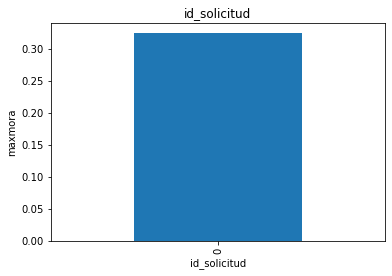

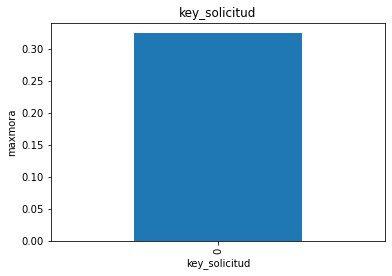

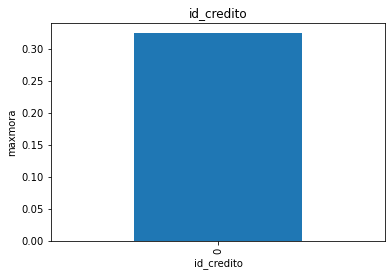

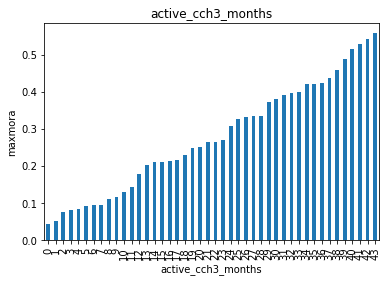

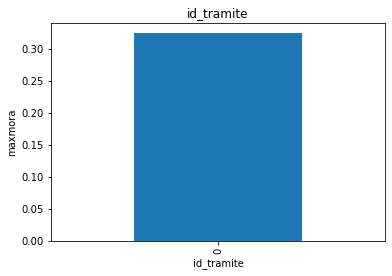

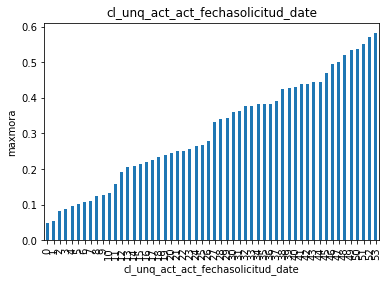

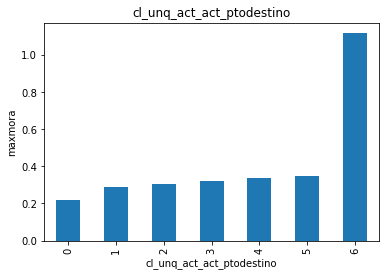

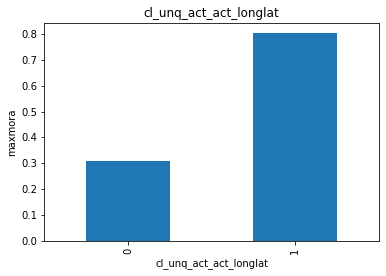

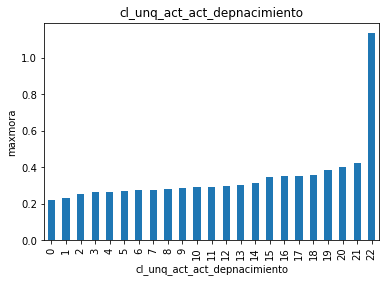

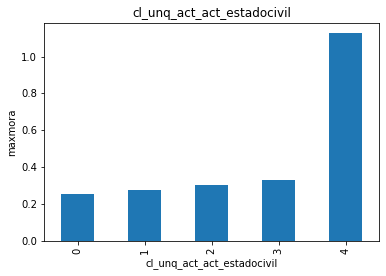

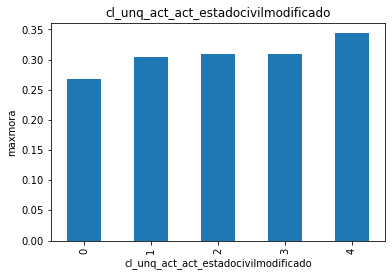

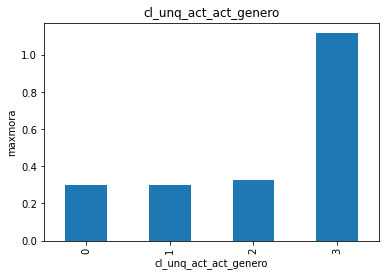

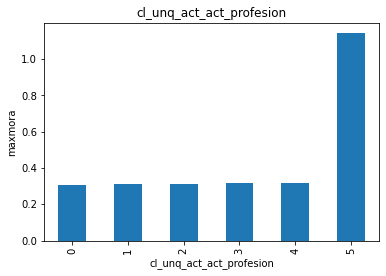

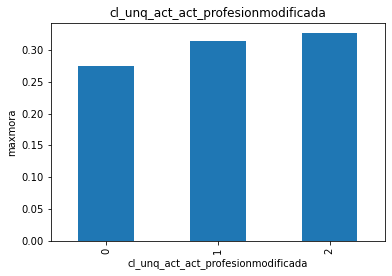

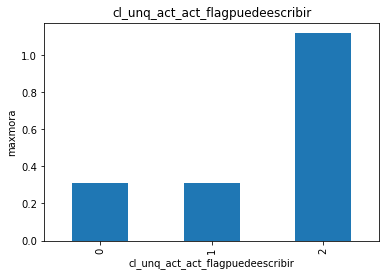

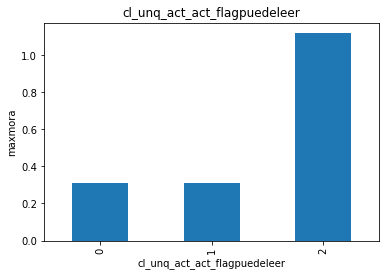

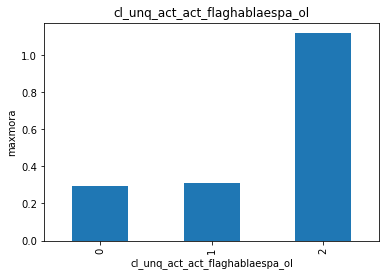

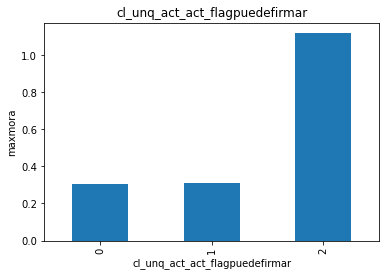

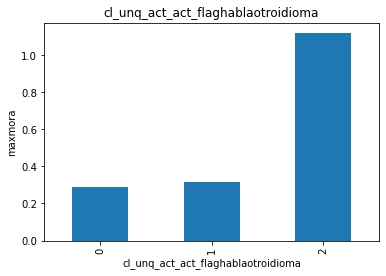

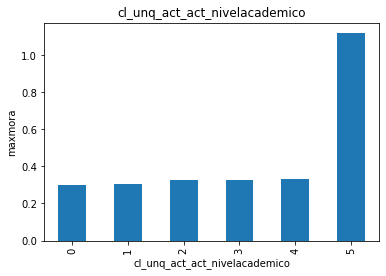

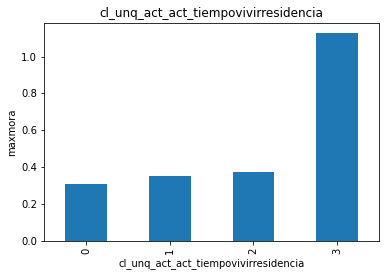

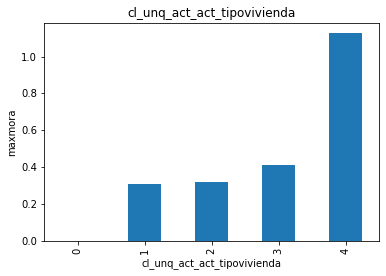

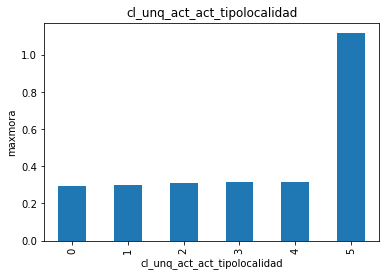

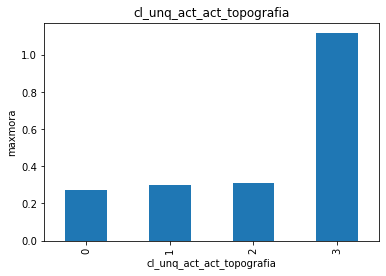

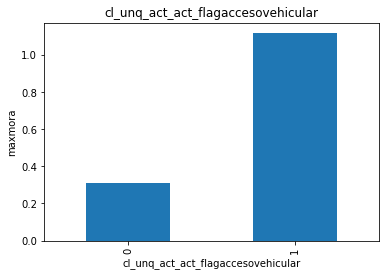

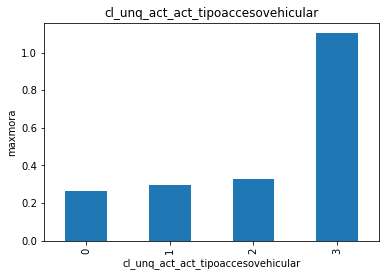

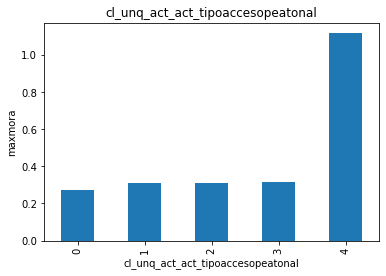

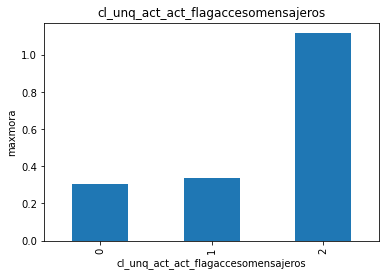

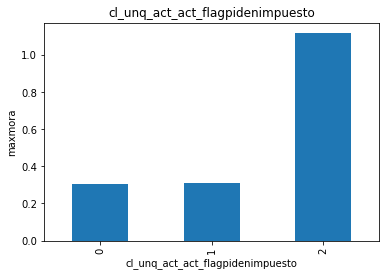

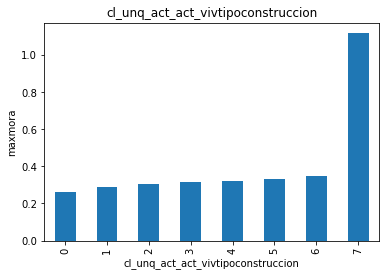

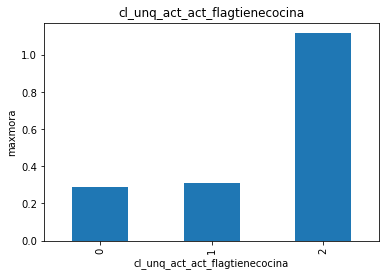

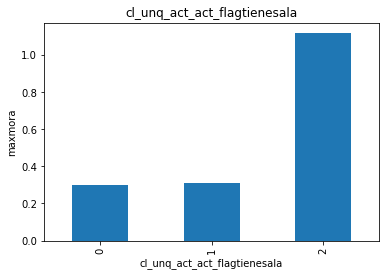

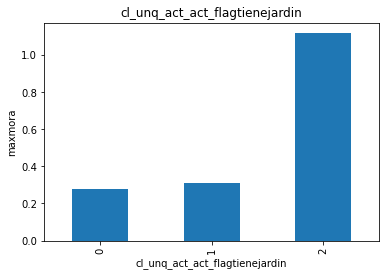

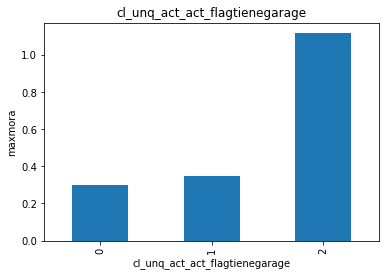

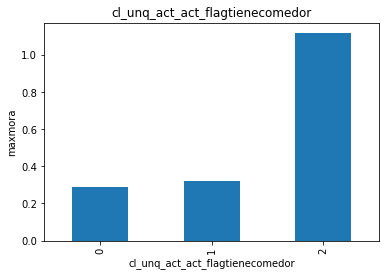

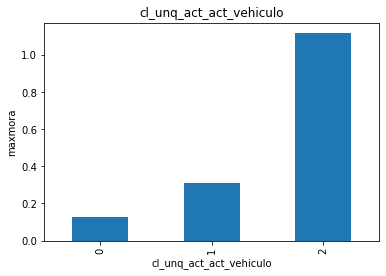

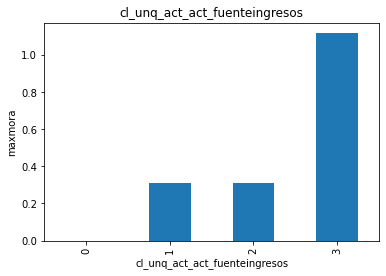

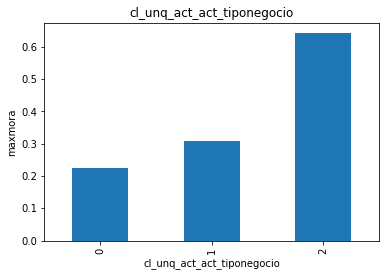

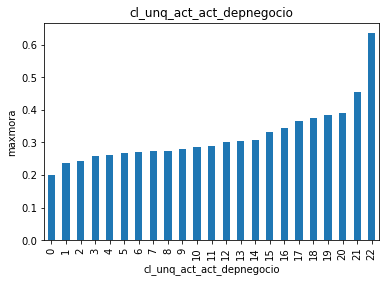

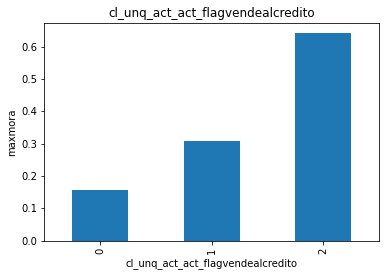

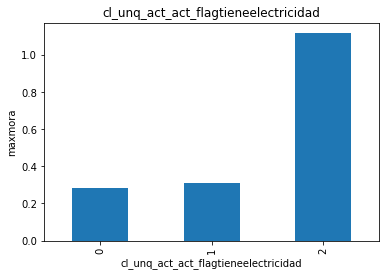

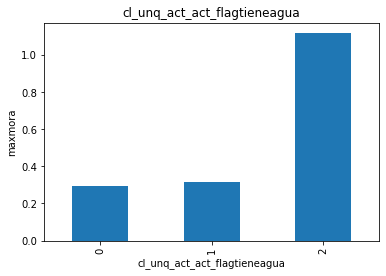

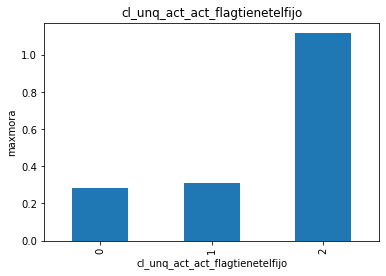

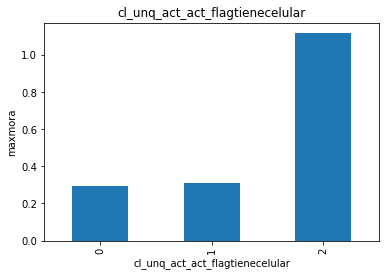

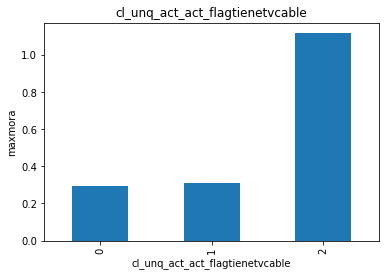

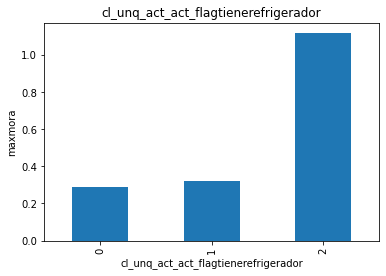

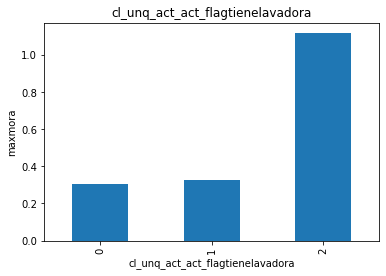

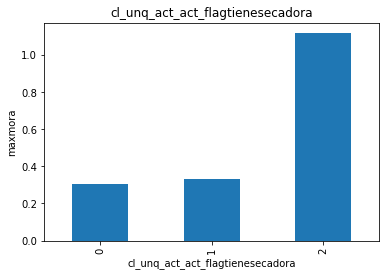

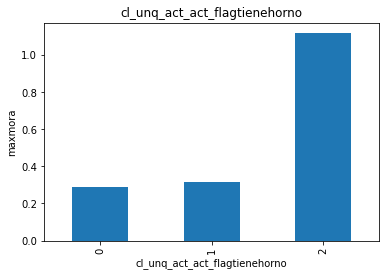

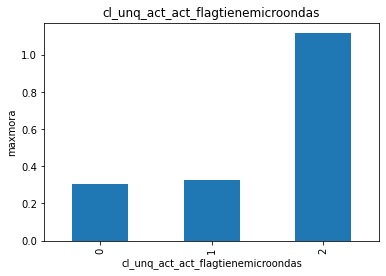

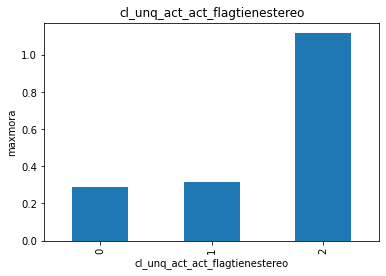

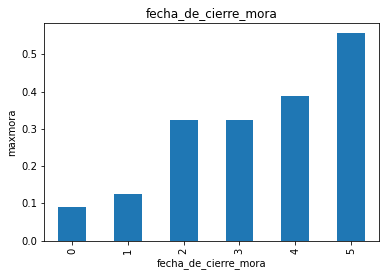

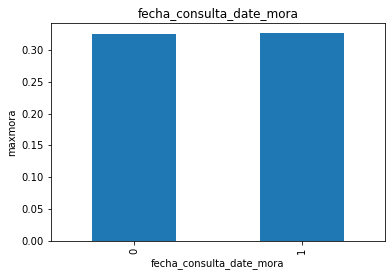

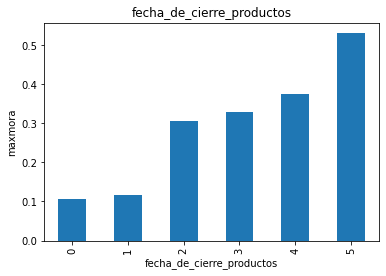

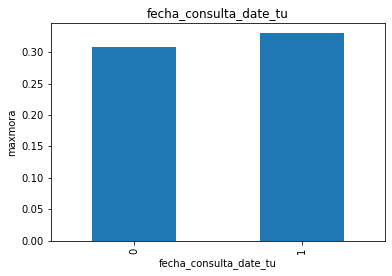

In [46]:
# let's show the monotonic relationship
# between labels and target

def analyse_vars(df, var):
    
    # function plots median house sale price per encoded
    # category
    
    df = df.copy()
    df.groupby(var)[target_var].mean().plot.bar() #or median
    plt.title(var)
    plt.ylabel(target_var)
    plt.show()
    
for var in cat_vars:
    analyse_vars(X_train, var)

In [47]:
# categorical variables of interest
CATEGORICAL_VARS = [
    "cl_unq_act_act_ptodestino",
    "cl_unq_act_act_depnacimiento",
    "cl_unq_act_act_estadocivil",
    "cl_unq_act_act_estadocivilmodificado",
    "cl_unq_act_act_genero",
    "cl_unq_act_act_flagpuedeescribir",
    "cl_unq_act_act_flagpuedeleer",
    "cl_unq_act_act_tiempovivirresidencia",
    "cl_unq_act_act_flagaccesovehicular",
    "cl_unq_act_act_tipoaccesovehicular",
    "cl_unq_act_act_flagaccesomensajeros",
    "cl_unq_act_act_flagtienegarage",
    "cl_unq_act_act_flagtienecomedor",
    "cl_unq_act_act_depnegocio",
    "cl_unq_act_act_flagtieneagua",
    "cl_unq_act_act_flagtienerefrigerador",
    "cl_unq_act_act_flagtienelavadora",
    "cl_unq_act_act_flagtienestereo",
]

In [48]:
X_train[CATEGORICAL_VARS].sum().sum()

894538

In [49]:
pd.Series(CATEGORICAL_VARS).to_csv('selected_categorical_features.csv', index=False)

The monotonic relationship is particularly clear for the variables depnegocio, fuenteingresos, and flagpuedeescribir. Note how, the higher the integer that now represents the category, the higher the mean maxmora.

(remember that the target is log-transformed, that is why the differences seem so small).

## Feature Scaling

For use in linear models, features need to be either scaled or normalised. In the next notebook, I will scale features to the minimum and maximum values:

In [50]:
# capture all variables in a list
# except the target and the ID

train_vars = [var for var in X_train.columns if var not in [identifier, target_var]]

# count number of variables
len(train_vars)

235

In [51]:
# create scaler
scaler = MinMaxScaler()

#  fit  the scaler to the train set
scaler.fit(X_train[train_vars]) 

# transform the train and test set
X_train[train_vars] = scaler.transform(X_train[train_vars])

X_test[train_vars] = scaler.transform(X_test[train_vars])

In [52]:
X_train.head()

,id_solicitud,key_solicitud,id_credito,maxmora,qty_meses_desde_desembolso,dfi_solicitud_mora,dfi_solicitud_productos,cl_unq_act_act_messolicitud,cl_unq_act_act_trimestresolicitud,active_cch3_months,ide_tramite,id_tramite,ide_cui,cl_unq_act_act_fechasolicitud,cl_unq_act_act_fechasolicitud_date,cl_unq_act_act_monto,cl_unq_act_act_plazo,cl_unq_act_act_agencia,cl_unq_act_act_ptodestino,cl_unq_act_act_flagaprobado,cl_unq_act_act_longlat,cl_unq_act_act_longitud,cl_unq_act_act_latitud,cl_unq_act_act_depnacimiento,cl_unq_act_act_estadocivil,cl_unq_act_act_estadocivilmodificado,cl_unq_act_act_genero,cl_unq_act_act_profesion,cl_unq_act_act_profesionmodificada,cl_unq_act_act_flagpuedeescribir,cl_unq_act_act_flagpuedeleer,cl_unq_act_act_flaghablaespa_ol,cl_unq_act_act_flagpuedefirmar,cl_unq_act_act_flaghablaotroidioma,cl_unq_act_act_nivelacademico,cl_unq_act_act_tiempovivirresidencia,cl_unq_act_act_tipovivienda,cl_unq_act_act_personasdependientes,cl_unq_act_act_tipolocalidad,cl_unq_act_act_topografia,cl_unq_act_act_flagaccesovehicular,cl_unq_act_act_tipoaccesovehicular,cl_unq_act_act_tipoaccesopeatonal,cl_unq_act_act_flagaccesomensajeros,cl_unq_act_act_flagpidenimpuesto,cl_unq_act_act_vivtipoconstruccion,cl_unq_act_act_cantidadniveles,cl_unq_act_act_cantidaddormitorios,cl_unq_act_act_cantidadba_os,cl_unq_act_act_flagtienecocina,cl_unq_act_act_flagtienesala,cl_unq_act_act_flagtienejardin,cl_unq_act_act_flagtienegarage,cl_unq_act_act_flagtienecomedor,cl_unq_act_act_vehiculo,cl_unq_act_act_fuenteingresos,cl_unq_act_act_tiponegocio,cl_unq_act_act_depnegocio,cl_unq_act_act_flagvendealcredito,cl_unq_act_act_negociomontoventasefectivo,cl_unq_act_act_negociototalingresos,cl_unq_act_act_totalbienes,cl_unq_act_act_totalpasivos,cl_unq_act_act_totalgastosfam,cl_unq_act_act_totalingresosfam,cl_unq_act_act_estresventas,cl_unq_act_act_estrescostoventas,cl_unq_act_act_estresgrossprofit,cl_unq_act_act_flagtieneelectricidad,cl_unq_act_act_flagtieneagua,cl_unq_act_act_flagtienetelfijo,cl_unq_act_act_flagtienecelular,cl_unq_act_act_flagtienetvcable,cl_unq_act_act_flagtienerefrigerador,cl_unq_act_act_flagtienelavadora,cl_unq_act_act_flagtienesecadora,cl_unq_act_act_flagtienehorno,cl_unq_act_act_flagtienemicroondas,cl_unq_act_act_flagtienestereo,cl_unq_act_act_fnacimiento_date,cl_unq_act_act_finicionegocio_date,cl_unq_act_act_fnacimiento_date_numberlong,cl_unq_act_act_finicionegocio_date_numberlong,id_mora,fecha_de_cierre_mora,fecha_consulta_date_mora,cl_cnt_12m_act_comcantidadmora1,cl_cnt_24m_act_comcantidadmora1,cl_cnt_12m_act_comcantidadmora2,cl_cnt_24m_act_comcantidadmora2,cl_des_12m_act_commaxdesvmora,cl_des_24m_act_commaxdesvmora,cl_max_12m_act_commaxmora,cl_max_24m_act_commaxmora,cl_max_act_act_commaxmora,cl_cnt_12m_act_ptocantidadmora1,cl_cnt_24m_act_ptocantidadmora1,cl_cnt_12m_act_ptocantidadmora2,cl_cnt_24m_act_ptocantidadmora2,cl_max_12m_act_ptomaxdesvmora,cl_max_24m_act_ptomaxdesvmora,cl_max_12m_act_ptomaxmora,cl_max_24m_act_ptomaxmora,cl_max_act_act_ptomaxmora,cl_cnt_12m_act_tccantidadmora1,cl_cnt_24m_act_tccantidadmora1,cl_cnt_12m_act_tccantidadmora2,cl_cnt_24m_act_tccantidadmora2,cl_des_12m_act_tcmaxdesvmora,cl_des_24m_act_tcmaxdesvmora,cl_max_12m_act_tcmaxmora,cl_max_24m_act_tcmaxmora,cl_unq_act_act_tcmoraact,cl_cnt_12m_act_servcantidadmora1,cl_cnt_12m_act_servcantidadmora2,cl_des_12m_act_servmaxdesvmora,cl_max_12m_act_servmaxmora,cl_max_act_act_servmaxmora,id_productos,fecha_de_cierre_productos,fecha_consulta_date_tu,cl_min_his_act_ptoexptotal,cl_min_his_act_ptoexpvig,cl_cnt_his_act_comcantidadtotal,cl_sum_his_act_commontototal,cl_cnt_act_act_comcantidadvig,cl_sum_act_act_commontovig,cl_sum_act_act_comsaldoenmora,cl_sum_act_act_comsaldovig,cl_cnt_his_act_ptocantidadtotal,cl_sum_his_act_ptomontototal,cl_cnt_act_act_ptocantidadvig,cl_sum_act_act_ptomontovigente,cl_sum_act_act_ptosaldomora,cl_sum_act_act_ptosaldovig,cl_cnt_act_act_servcantidadvig,cl_sum_act_act_servsaldomora,cl_sum_act_act_servsaldovig,cl_cnt_his_act_tccantidadtotal,cl_sum_his_ac

In [53]:
# let's now save the train and test sets for the next notebook!

X_train.to_csv('xtrain.csv', index=False)
X_test.to_csv('xtest.csv', index=False)

That concludes the feature engineering section for this dataset.